<a href="https://colab.research.google.com/github/AshishShinde03/ML/blob/main/ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import yfinance as yf
from datetime import*
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm


In [ ]:
ticker = 'panw'
start = '1926-07-01'
end = '2023-01-31'

In [ ]:
df_pawn = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_pawn = df_pawn.reset_index(0).reset_index(drop=True)

In [ ]:
df_pawn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...
2644,2023-01-24,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [ ]:
ADS_DF = pd.read_csv(r'https://raw.githubusercontent.com/AshishShinde03/DataSet_MLFin/main/ADS.csv')

In [ ]:
ADS_DF

,Date,ADS_Index
0,1960:03:01,-0.580320
1,1960:03:02,-0.627497
2,1960:03:03,-0.671697
3,1960:03:04,-0.712936
4,1960:03:05,-0.751225
...,...,...
23030,2023:03:21,0.028513
23031,2023:03:22,0.027573
23032,2023:03:23,0.026756
23033,2023:03:24,0.026063


In [ ]:
ADS_DF['Date'] = pd.to_datetime(ADS_DF['Date'], format='%Y:%m:%d')

In [ ]:
ADS_DF['ADS_Index'] = ADS_DF['ADS_Index']/100

In [ ]:
ADS_DF

,Date,ADS_Index
0,1960-03-01,-0.005803
1,1960-03-02,-0.006275
2,1960-03-03,-0.006717
3,1960-03-04,-0.007129
4,1960-03-05,-0.007512
...,...,...
23030,2023-03-21,0.000285
23031,2023-03-22,0.000276
23032,2023-03-23,0.000268
23033,2023-03-24,0.000261


In [ ]:
startdate = pd.to_datetime('2012-07-20')
enddate = pd.to_datetime('2023-01-30')
ADS_DF = ADS_DF[(ADS_DF['Date'] >= startdate) & (ADS_DF['Date'] <= enddate)]

In [ ]:
merged_ADS_df = pd.merge(df_pawn, ADS_DF, on='Date', how='inner')

In [ ]:
merged_ADS_df

,Date,Open,High,Low,Close,Adj Close,Volume,ADS_Index
0,2012-07-20,18.383333,20.690001,17.700001,17.709999,17.709999,21048300,-0.003825
1,2012-07-23,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,-0.004002
2,2012-07-24,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,-0.004070
3,2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,-0.004140
4,2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,-0.004213
...,...,...,...,...,...,...,...,...
2644,2023-01-24,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,0.001172
2645,2023-01-25,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,0.001140
2646,2023-01-26,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,0.001095
2647,2023-01-27,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,0.001037


In [ ]:
merged_ADS_df['Y_lag'] = merged_ADS_df['Adj Close'].shift(1)
merged_ADS_df['ADS_lag'] = merged_ADS_df['ADS_Index'].shift(1)
merged_ADS_df['Y_diff'] = merged_ADS_df['Adj Close'].diff()
merged_ADS_df['ADS_diff'] = merged_ADS_df['ADS_Index'].diff()

In [ ]:
merged_ADS_df

,Date,Open,High,Low,Close,Adj Close,Volume,ADS_Index,Y_lag,ADS_lag,Y_diff,ADS_diff
0,2012-07-20,18.383333,20.690001,17.700001,17.709999,17.709999,21048300,-0.003825,NaN,NaN,NaN,NaN
1,2012-07-23,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,-0.004002,17.709999,-0.003825,-0.539999,-0.000177
2,2012-07-24,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,-0.004070,17.170000,-0.004002,1.330000,-0.000068
3,2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,-0.004140,18.500000,-0.004070,1.150000,-0.000070
4,2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,-0.004213,19.650000,-0.004140,0.309999,-0.000073
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,0.001172,149.339996,0.001191,1.800003,-0.000019
2645,2023-01-25,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,0.001140,151.139999,0.001172,0.639999,-0.000032
2646,2023-01-26,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,0.001095,151.779999,0.001140,7.330002,-0.000045
2647,2023-01-27,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,0.001037,159.110001,0.001095,0.669998,-0.000058


In [ ]:
merged_ADS_df = merged_ADS_df.iloc[1:]

In [ ]:
merged_ADS_df

,Date,Open,High,Low,Close,Adj Close,Volume,ADS_Index,Y_lag,ADS_lag,Y_diff,ADS_diff
1,2012-07-23,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,-0.004002,17.709999,-0.003825,-0.539999,-0.000177
2,2012-07-24,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,-0.004070,17.170000,-0.004002,1.330000,-0.000068
3,2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,-0.004140,18.500000,-0.004070,1.150000,-0.000070
4,2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,-0.004213,19.650000,-0.004140,0.309999,-0.000073
5,2012-07-27,20.293333,20.293333,19.000000,19.000000,19.000000,460200,-0.004288,19.959999,-0.004213,-0.959999,-0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,0.001172,149.339996,0.001191,1.800003,-0.000019
2645,2023-01-25,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,0.001140,151.139999,0.001172,0.639999,-0.000032
2646,2023-01-26,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,0.001095,151.779999,0.001140,7.330002,-0.000045
2647,2023-01-27,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,0.001037,159.110001,0.001095,0.669998,-0.000058


In [ ]:
Y = merged_ADS_df['Y_diff']
Y.shape

(2648,)

In [ ]:
X = merged_ADS_df[['Y_lag', 'ADS_lag', 'ADS_diff']]

In [ ]:
X.shape

(2648, 3)

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(Y, X)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Y_diff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.101
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.347
Time:                        20:17:05   Log-Likelihood:                -5770.3
No. Observations:                2648   AIC:                         1.155e+04
Df Residuals:                    2644   BIC:                         1.157e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0914      0.074      1.232      0.2

In [ ]:
results.params

const        0.091375
Y_lag       -0.000577
ADS_lag     -0.850216
ADS_diff    34.411883
dtype: float64

𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝐴𝐷𝑆𝑡 ― 1 + 𝜀𝑡

In [ ]:
intercept, y_lag, ads_lag, ads_diff = results.params

In [ ]:
Yt = intercept - y_lag*merged_ADS_df['Adj Close'].shift(1) - ads_lag*merged_ADS_df['ADS_Index'].shift(1) + ads_diff*merged_ADS_df['ADS_diff'].shift(1)

In [ ]:
# y_pred = results.predict(X)

In [ ]:
Yt

1            NaN
2       0.091785
3       0.096253
4       0.096771
5       0.096800
          ...   
2644    0.179232
2645    0.178866
2646    0.178763
2647    0.182507
2648    0.182399
Length: 2648, dtype: float64

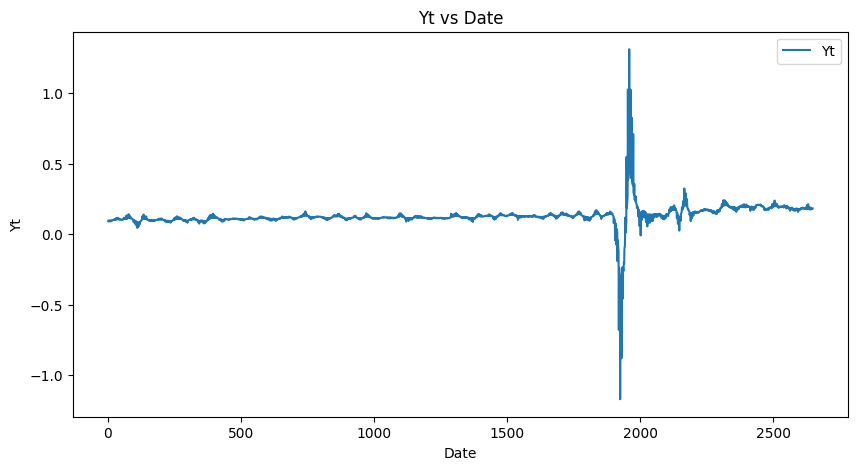

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the data
plt.plot(merged_ADS_df.index, Yt, label='Yt')

# Add titles and labels
plt.title('Yt vs Date')
plt.xlabel('Date')
plt.ylabel('Yt')

# Add a legend
plt.legend()

# Show the plot
plt.show()

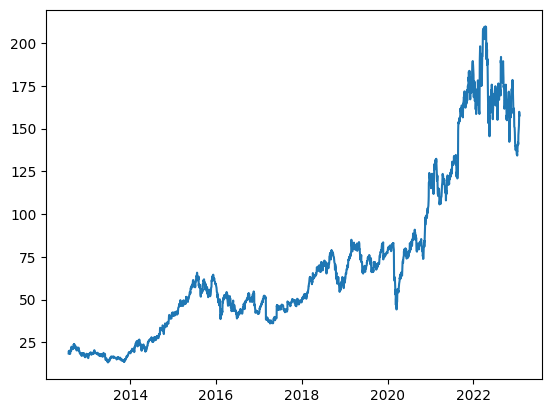

In [ ]:
plt.plot(merged_ADS_df['Date'].iloc[1:], merged_ADS_df['Close'].iloc[1:], label='Close')

In [ ]:
# Calculate residuals
residuals = Y - Yt

# Calculate MSE and RMSE
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 4.595823668148929
RMSE: 2.1437872254841266
